In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
def cv_show(name, img):    
    cv2.imshow(name, img)    
    cv2.waitKey(0)    
    cv2.destroyAllWindows()

### 直方图（histogram）

<img src='assets/histogram.jpg' />


cv2.calcHist 函数是 OpenCV 库中的一个函数，用于计算直方图。</br>直方图是一种统计图形，用于显示数据分布的情况，特别是在计算机视觉中，它用于显示图像中像素值的分布。

##### hist = cv2.calcHist([images], channels, mask, histSize, ranges)

参数：</br>
- images：输入图像**列表**，可以是一个图像数组，也可以是一个图像。
- channels：要计算的通道列表。例如，[0] 表示只计算第一个通道（通常是蓝色通道），[0, 1] 表示计算前两个通道（蓝色和绿色通道）。
- mask：可选掩码图像，用于限制直方图计算的范围。掩码为 None 表示计算整个图像的直方图。
- histSize：直方图的大小，它是一个元组，表示每个通道的直方图大小。例如，(256, 256, 256) 表示每个通道都有 256 个bin（一个bin其实就是直方图中的一个直方图柱子）。
- ranges：通道的值范围，它是一个元组，表示每个通道的值范围。例如，(0, 256) 表示蓝色通道的值范围是从 0 到 255。

返回值：</br>
- hist 是计算得到的直方图，它是一个数组，每个元素代表直方图中一个bin的值。

##### 示例

In [7]:
img = cv2.imread('assets/cat.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist.shape

(256, 1)

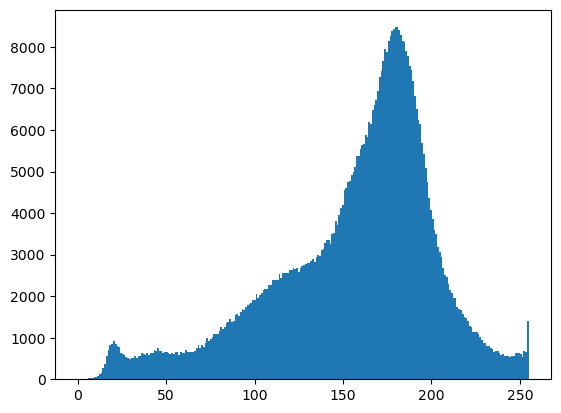

In [13]:
#  .ravel() 方法将图像数组展平为一维数组
plt.hist(img.ravel(), 256)
# plt.plot(hist)
plt.show()

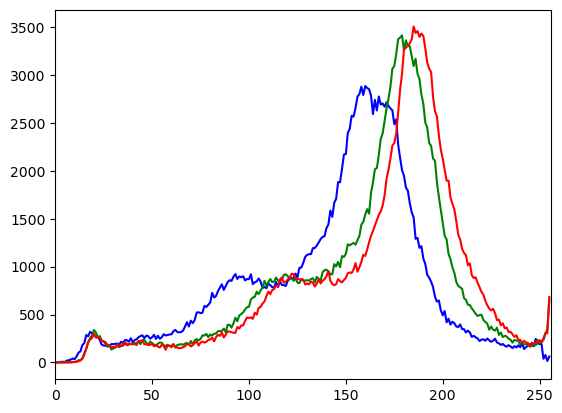

In [8]:
img = cv2.imread('assets/cat.jpg')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

Mask

In [20]:
# 创建掩码mask
mask = np.zeros(img.shape[:2], np.uint8)
# 掩码中心白色区域
mask[100:300, 100:400] = 255
cv_show('mask', mask)

In [21]:
img = cv2.imread('assets\cat.jpg', cv2.IMREAD_GRAYSCALE)
cv_show('original img', img)

In [22]:
masked_img = cv2.bitwise_and(img, img, mask=mask)  # 与操作
cv_show('masked_img', masked_img)

In [23]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

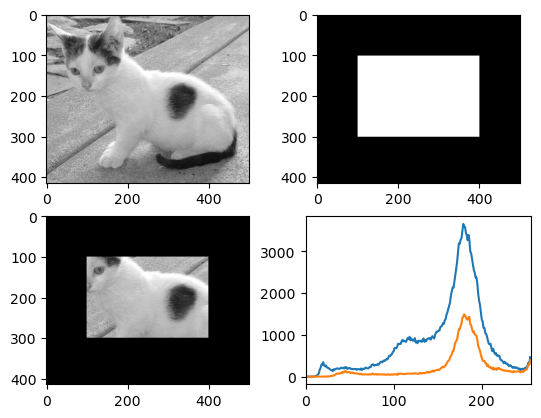

In [24]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

### 直方图均衡化

直方图均衡化是图像处理中的一种重要技术，它可以提高图像的对比度，使图像的灰度分布更加均匀，特别是在图像整体偏暗或过亮时，均衡化可以有效地改善图像的视觉效果。

<img src='assets/equalization_1.jpg' width=600 style="display: block; margin: 0 auto;"/>
</br>
<img src='assets/equalization_2.jpg' width=900 style="display: block; margin: 0 auto;"/>
<img src='assets/equalization_3.jpg' width=900 style="display: block; margin: 0 auto;"/>
</br>
<img src='assets/equalization_4.jpg' width=900 style="display: block; margin: 0 auto;"/>

cv2.equalizeHist 函数是 OpenCV 库中的一个函数，用于对图像的直方图进行均衡化。</br>直方图均衡化是一种增强图像对比度的技术，它通过扩展图像的灰度级来改善图像的视觉效果。

##### dst = cv2.equalizeHist(src)

参数：
- src：输入图像，通常是灰度图像。

返回值：
- dst 是直方图均衡化后的图像。

##### 示例

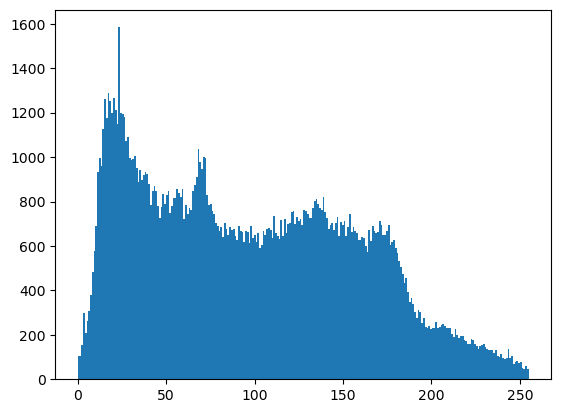

In [32]:
img = cv2.imread('assets/clahe.jpg', cv2.IMREAD_GRAYSCALE)
plt.hist(img.ravel(), 256)
plt.show()

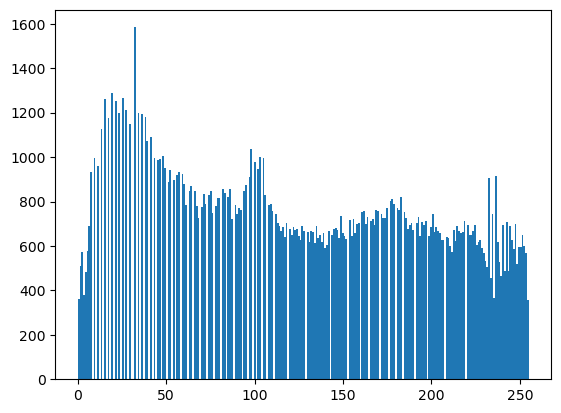

In [33]:
# 直方图均衡化
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(), 256)
plt.show()

In [34]:
res = np.hstack((img, equ))
cv_show('', res)

#### 自适应的直方图均衡化

cv2.createCLAHE 函数是 OpenCV 库中的一个函数，用于创建一个自适应的直方图均衡化（Contrast Limited Adaptive Histogram Equalization，CLAHE）对象。</br>CLAHE 是直方图均衡化的一种变体，它在增强图像对比度的同时限制了对比度的最大增加量，这有助于避免图像中的某些区域变得过于亮或过于暗。

##### clahe = cv2.createCLAHE(clipLimit, tileGridSize)

参数：
- clipLimit：对比度限制，它决定了直方图均衡化过程中的对比度增加量。较大的 clipLimit 值会导致对比度的增加量较小，从而减少图像中的过亮或过暗区域。这个值应该是一个浮点数，默认为 2.0。
- tileGridSize：直方图均衡化的网格大小。这个参数定义了直方图均衡化过程中用于计算局部直方图和直方图均衡化的像素块的大小。默认值为 (8, 8)，表示每个像素块的大小为 8x8 像素。较大的网格大小可能会导致处理速度变慢，但可能会提供更好的局部对比度增强。

返回值：
- clahe 是一个 CLAHE 对象，可以用来对图像进行直方图均衡化处理。

##### 示例

In [40]:
# 创建一个CLAHE对象
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# 将CLAHE对象应用于图像中，使其均衡化
res_clahe = clahe.apply(img)

In [42]:
res = np.hstack((img, equ, res_clahe))
cv_show('', res)